- Pengubahan StandardScaler menjadi RobustScaler
- Train: 18 Sep 2012 - 18 Oct 2022
- Validation: 19 Oct 2022 - 25 Nov 2022

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import talib

def generate_TAs_features(df):
    """
    Function to generate Technical Analysis features:
    - MA (Moving Average)
    - RSI (Relative Strength Index)
    - MFI (Money Flow Index)
    """
    res = df.copy()
    for i in [7, 14, 21]:
        # Moving Average
        res[f'{i} DAYS MA'] = talib.MA(res['Close'], timeperiod=i)
        res[f'{i} DAYS MA'] = res[f'{i} DAYS MA'].shift(1)
        
        # RSI (Relative Strength Index)
        res[f'RSI {i}'] = talib.RSI(res['Close'], timeperiod=i)
        
        # MFI (Money Flow Index)
        res[f'MFI {i}'] = talib.MFI(res['High'], res['Low'], res['Close'], res['Volume'], timeperiod=i)
        
        # Standard Deviation
        if i == 7:
            res[f'{i} DAYS STD DEV'] = res['Close'].rolling(i).std()
            res[f'{i} DAYS STD DEV'] = res[f'{i} DAYS STD DEV'].shift(1)
    
    print(res.isnull().sum())
    res = res[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',            
               '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV',
               'RSI 7', 'RSI 14', 'RSI 21',            
               'MFI 7', 'MFI 14', 'MFI 21']]
    res = res.dropna()
    return res

def generate_date_related_features(df):
    """
    Function to generate date related features
    """
    res = df.copy()
    res['dayofweek'] = df.index.dayofweek
    res['quarter'] = df.index.quarter
    res['month'] = df.index.month
    res['year'] = df.index.year
    res['dayofyear'] = df.index.dayofyear
    res['dayofmonth'] = df.index.day
    res['weekofyear'] = df.index.isocalendar().week
    return res

In [3]:
import yfinance as yf

In [4]:
df = yf.download('ISAT.JK', start='2012-09-18', end='2022-11-25')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-18,6325.0,6375.0,6250.0,6300.0,6300.0,2693500
2022-11-21,6400.0,6400.0,6250.0,6300.0,6300.0,1457400
2022-11-22,6300.0,6350.0,6250.0,6275.0,6275.0,1784700
2022-11-23,6275.0,6350.0,6225.0,6225.0,6225.0,3384600
2022-11-24,6250.0,6300.0,6175.0,6250.0,6250.0,2486300


In [5]:
df.index = pd.to_datetime(df.index)

## Feature Extraction

In [6]:
df2 = generate_TAs_features(df)
df2.tail()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
RSI 7              7
MFI 7              7
7 DAYS STD DEV     7
14 DAYS MA        14
RSI 14            14
MFI 14            14
21 DAYS MA        21
RSI 21            21
MFI 21            21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21
Date,,,,,,,,,,,,,,,,
2022-11-18,6325.0,6375.0,6250.0,6300.0,6300.0,2693500,6535.714286,6669.642857,6602.380952,147.094884,30.061833,38.002881,40.831032,18.132022,36.164093,48.419978
2022-11-21,6400.0,6400.0,6250.0,6300.0,6300.0,1457400,6500.000000,6635.714286,6596.428571,171.391365,30.061833,38.002881,40.831032,27.880328,31.739526,47.488202
2022-11-22,6300.0,6350.0,6250.0,6275.0,6275.0,1784700,6453.571429,6591.071429,6586.904762,175.848284,28.617705,37.267510,40.339173,8.717671,21.054399,43.404566
2022-11-23,6275.0,6350.0,6225.0,6225.0,6225.0,3384600,6385.714286,6544.642857,6573.809524,127.358699,25.733265,35.776429,39.343890,7.959354,19.831998,36.940778
2022-11-24,6250.0,6300.0,6175.0,6250.0,6250.0,2486300,6335.714286,6501.785714,6553.571429,107.874486,29.857333,37.130879,40.119537,7.938825,19.186938,37.130510


In [7]:
df3 = generate_date_related_features(df2)
df3.tail()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,...,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-18,6325.0,6375.0,6250.0,6300.0,6300.0,2693500,6535.714286,6669.642857,6602.380952,147.094884,...,18.132022,36.164093,48.419978,4,4,11,2022,322,18,46
2022-11-21,6400.0,6400.0,6250.0,6300.0,6300.0,1457400,6500.000000,6635.714286,6596.428571,171.391365,...,27.880328,31.739526,47.488202,0,4,11,2022,325,21,47
2022-11-22,6300.0,6350.0,6250.0,6275.0,6275.0,1784700,6453.571429,6591.071429,6586.904762,175.848284,...,8.717671,21.054399,43.404566,1,4,11,2022,326,22,47
2022-11-23,6275.0,6350.0,6225.0,6225.0,6225.0,3384600,6385.714286,6544.642857,6573.809524,127.358699,...,7.959354,19.831998,36.940778,2,4,11,2022,327,23,47
2022-11-24,6250.0,6300.0,6175.0,6250.0,6250.0,2486300,6335.714286,6501.785714,6553.571429,107.874486,...,7.938825,19.186938,37.130510,3,4,11,2022,328,24,47


In [8]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.tail()

,Close,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2022-11-18,6300.0,6535.714286,6669.642857,6602.380952,147.094884,30.061833,38.002881,40.831032,18.132022,36.164093,48.419978,4,4,11,2022,322,18,46
2022-11-21,6300.0,6500.000000,6635.714286,6596.428571,171.391365,30.061833,38.002881,40.831032,27.880328,31.739526,47.488202,0,4,11,2022,325,21,47
2022-11-22,6275.0,6453.571429,6591.071429,6586.904762,175.848284,28.617705,37.267510,40.339173,8.717671,21.054399,43.404566,1,4,11,2022,326,22,47
2022-11-23,6225.0,6385.714286,6544.642857,6573.809524,127.358699,25.733265,35.776429,39.343890,7.959354,19.831998,36.940778,2,4,11,2022,327,23,47
2022-11-24,6250.0,6335.714286,6501.785714,6553.571429,107.874486,29.857333,37.130879,40.119537,7.938825,19.186938,37.130510,3,4,11,2022,328,24,47


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2508 entries, 2012-10-17 to 2022-11-24
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2508 non-null   float64
 1   7 DAYS MA       2508 non-null   float64
 2   14 DAYS MA      2508 non-null   float64
 3   21 DAYS MA      2508 non-null   float64
 4   7 DAYS STD DEV  2508 non-null   float64
 5   RSI 7           2508 non-null   float64
 6   RSI 14          2508 non-null   float64
 7   RSI 21          2508 non-null   float64
 8   MFI 7           2508 non-null   float64
 9   MFI 14          2508 non-null   float64
 10  MFI 21          2508 non-null   float64
 11  dayofweek       2508 non-null   int64  
 12  quarter         2508 non-null   int64  
 13  month           2508 non-null   int64  
 14  year            2508 non-null   int64  
 15  dayofyear       2508 non-null   int64  
 16  dayofmonth      2508 non-null   int64  
 17  weekofyear     

In [10]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4 = df4.rename(columns={'Close_': 'Close'})
df4.tail()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2022-11-18,6535.714286,6669.642857,6602.380952,147.094884,30.061833,38.002881,40.831032,18.132022,36.164093,48.419978,4,4,11,2022,322,18,46,6300.0
2022-11-21,6500.000000,6635.714286,6596.428571,171.391365,30.061833,38.002881,40.831032,27.880328,31.739526,47.488202,0,4,11,2022,325,21,47,6300.0
2022-11-22,6453.571429,6591.071429,6586.904762,175.848284,28.617705,37.267510,40.339173,8.717671,21.054399,43.404566,1,4,11,2022,326,22,47,6275.0
2022-11-23,6385.714286,6544.642857,6573.809524,127.358699,25.733265,35.776429,39.343890,7.959354,19.831998,36.940778,2,4,11,2022,327,23,47,6225.0
2022-11-24,6335.714286,6501.785714,6553.571429,107.874486,29.857333,37.130879,40.119537,7.938825,19.186938,37.130510,3,4,11,2022,328,24,47,6250.0


## Data Standardization

### Standard Scaler

In [11]:
# standard_df = df4.copy()

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# features_scaler = StandardScaler()
# features = standard_df.columns[:-1]
# standard_df[features] = features_scaler.fit_transform(standard_df[features])

In [14]:
# close_scaler = StandardScaler()
# standard_df['Close'] = close_scaler.fit_transform(np.array(standard_df['Close']).reshape(-1,1))

In [15]:
# standard_df.head()

### Robust Scaler

In [16]:
robust_df = df4.copy()

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
features_scaler = RobustScaler()
features = robust_df.columns[:-1]
robust_df[features] = features_scaler.fit_transform(robust_df[features])

In [19]:
close_scaler = RobustScaler()
robust_df['Close'] = close_scaler.fit_transform(np.array(robust_df['Close']).reshape(-1,1))

In [20]:
robust_df.tail()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2022-11-18,0.616109,0.661662,0.636745,0.604579,-0.712429,-0.590962,-0.569329,-0.770008,-0.493930,-0.201796,1.0,0.5,0.666667,1.0,0.739541,0.133333,0.730769,0.534574
2022-11-21,0.603385,0.649625,0.634636,0.863877,-0.712429,-0.590962,-0.569329,-0.548110,-0.627258,-0.234743,-1.0,0.5,0.666667,1.0,0.755735,0.333333,0.769231,0.534574
2022-11-22,0.586843,0.633786,0.631261,0.911442,-0.768330,-0.630430,-0.602452,-0.984305,-0.949237,-0.379138,-0.5,0.5,0.666667,1.0,0.761134,0.400000,0.769231,0.525709
2022-11-23,0.562667,0.617314,0.626621,0.393949,-0.879984,-0.710460,-0.669475,-1.001566,-0.986073,-0.607693,0.0,0.5,0.666667,1.0,0.766532,0.466667,0.769231,0.507979
2022-11-24,0.544853,0.602110,0.619450,0.186009,-0.720345,-0.637764,-0.617242,-1.002034,-1.005511,-0.600985,0.5,0.5,0.666667,1.0,0.771930,0.533333,0.769231,0.516844


## Save Files

### Save scalers

In [21]:
from joblib import dump, load

In [22]:
dump(features_scaler, 'isat_features_scaler.bin', compress=True)

['isat_features_scaler.bin']

In [23]:
dump(close_scaler, 'isat_close_scaler.bin', compress=True)

['isat_close_scaler.bin']

In [24]:
test_loaded_sc = load('isat_close_scaler.bin')
test_loaded_sc.inverse_transform(np.array(robust_df['Close']).reshape(-1,1))[-1]

array([6250.])

### Save .csv file

In [25]:
robust_df.to_csv('../cleaned_data/ISAT.csv')

## EDA

In [26]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


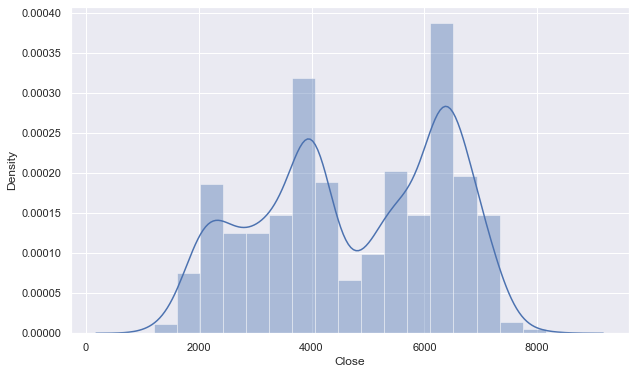

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df4['Close'])
plt.show()

In [28]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

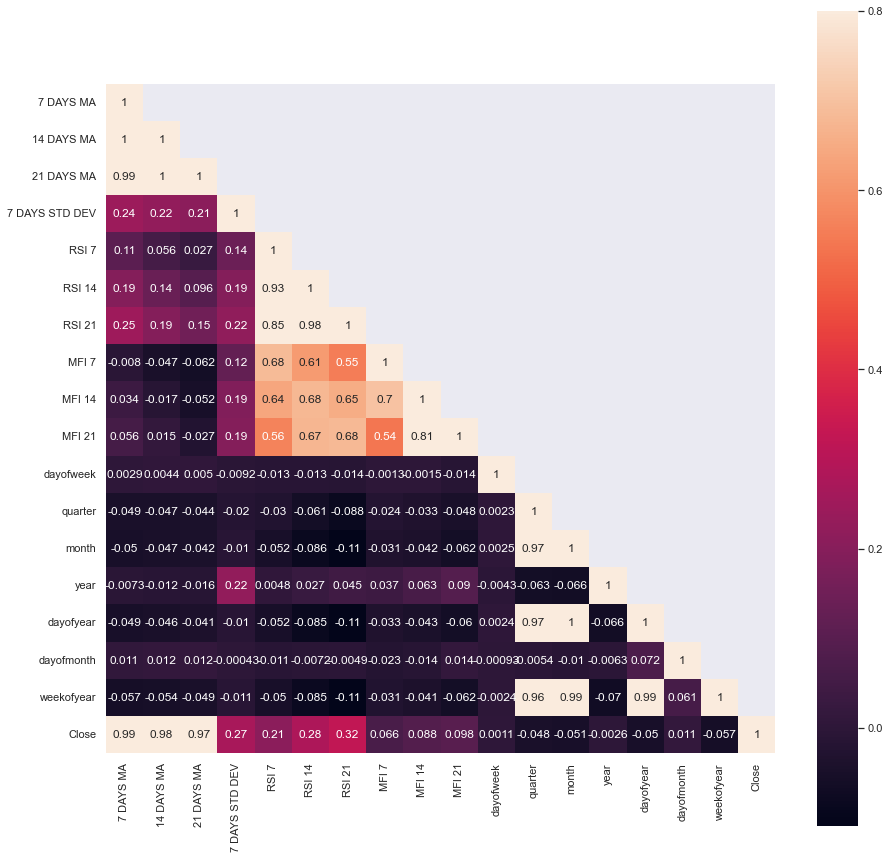

In [29]:
corr_data = robust_df.corr()
plot_corr_coef(corr_data)

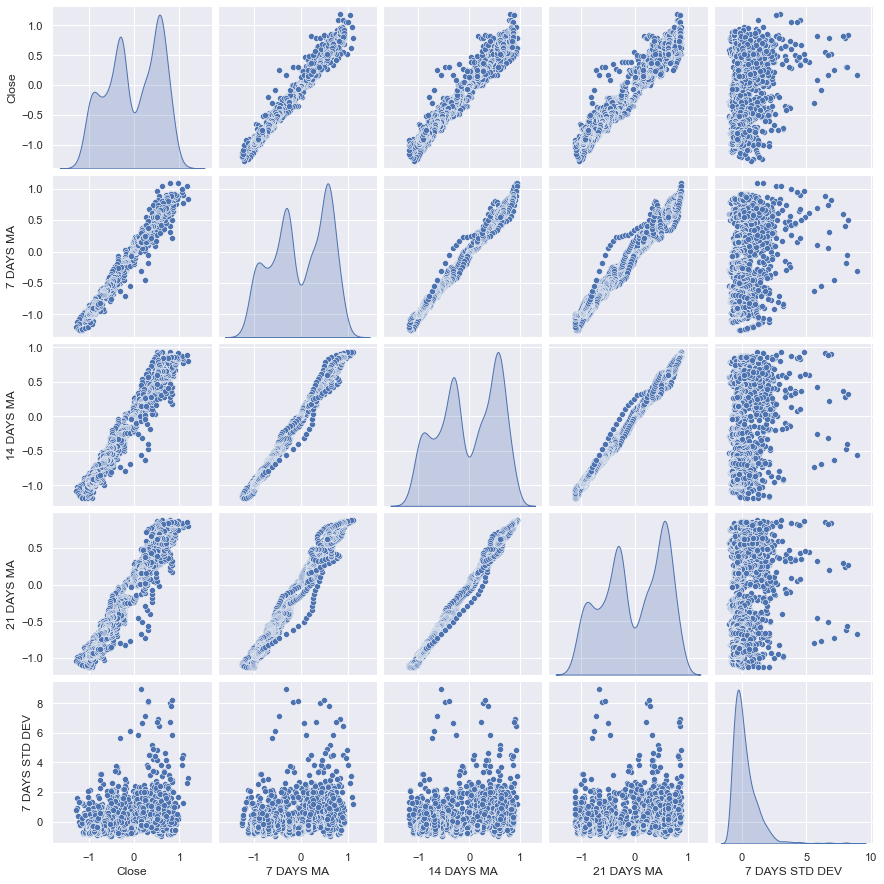

In [30]:
sns.pairplot(robust_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV']], diag_kind='kde')
plt.show()

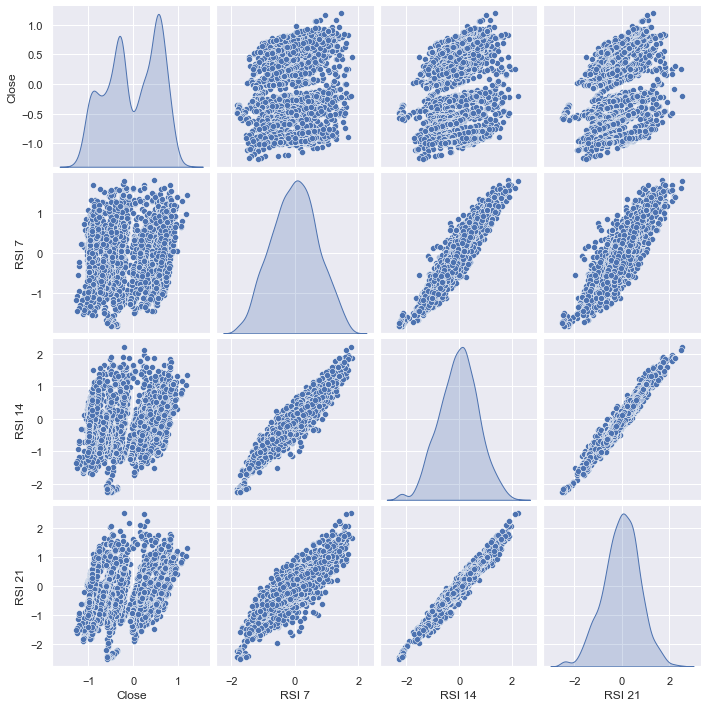

In [31]:
sns.pairplot(robust_df[['Close', 'RSI 7', 'RSI 14', 'RSI 21']], diag_kind='kde')
plt.show()